# Perceptron and Multi-Layer Perceptron

First the imports, Always

In [3]:
import numpy as np
import matplotlib.pyplot as mp

## Artificial Neural Networks

There are many ways of knitting the nodes of a neural network together, and each way results in a more or less complex behavior. Possibly the simplest of all topologies is the feed-forward network. Signals flow in one direction only; there is never any loop in the signal paths.

![title](img/NNFL_1.png)


Typically, ANN’s have a layered structure. The input layer picks up the input signals and passes them on to the next layer, the so-called ‘hidden’ layer. (Actually, there may be more than one hidden layer in a neural network.) Last comes the output layer that delivers the result.

Note: Input layer is not a layer as such, and should not be called an input layer, rather, should be named only as "Inputs". However, since many of the textbooks do adhere to this notation, we use the term input layer here.

![title](img/NNFL_2.png)


Just like a biological neuron has dendrites to receive signals, a cell body to process them, and an axon to send signals out to other neurons, the artificial neuron has a number of input channels, a processing stage, and one output that can fan out to multiple other artificial neurons.

#### 1) Each input gets scaled up or down

When a signal comes in, it gets multiplied by a weight value that is assigned to this particular input. That is, if a neuron has three inputs, then it has three weights that can be adjusted individually. During the learning phase, the neural network can adjust the weights based on the error of the last test result.

#### 2) All signals are summed up

In the next step, the modified input signals are summed up to a single value. In this step, an offset is also added to the sum. This offset is called bias. The neural network also adjusts the bias during the learning phase.

This is where the magic happens! At the start, all the neurons have random weights and random biases. After each learning iteration, weights and biases are gradually shifted so that the next result is a bit closer to the desired output. This way, the neural network gradually moves towards a state where the desired patterns are “learned”.

#### 3) Activation

Finally, the result of the neuron’s calculation is turned into an output signal. This is done by feeding the result to an activation function (also called transfer function).

# The Perceptron

The most basic form of an activation function is a simple binary function that has only two possible results.

![title](img/NNFL_3.png)


This function returns 1 if the input is positive or zero, and 0 for any negative input. A neuron whose activation function is a function like this is called a perceptron.

![title](img/NNFL_4.png)


A single perceptron, as bare and simple as it might appear, is able to learn where this line is, and when it finished learning, it can tell whether a given point is above or below that line.

## Single Perceptron for a two input AND gate 

In [283]:
def activation(x):
    ypred = np.zeros(x.shape)
    ypred[x>=0]=1
    ypred[x<0]=-1
    return ypred

def mse(y,y_dash):
    return np.sqrt((1/len(y)) * np.sum(np.square(y-y_dash)))

def linear_combination(weights,x,bias):
    return np.dot(weights,x) + bias

def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [100]:
weights = np.random.randn(2,1)
bias = 0

In [101]:
# Learning here
iterations = 1000
learning_rate = 0.01
m = 4
X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]]).T
Y = np.array([-1,-1,-1,1])
N = X.shape[0]

In [102]:
losses = []

for i in range(iterations):
    Y_dash = activation(linear_combination(weights,X,bias))    
    
    #BackProp
    loss = mse(Y,Y_dash)
    m_grad = (2/m) * np.sum(X * (Y_dash - Y))
    c_grad = (2/m) * np.sum(Y_dash - Y)
    weights-= learning_rate * m_grad
    bias-= learning_rate * c_grad
    losses.append(loss)
    

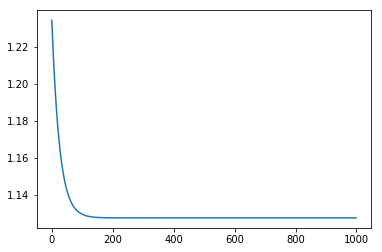

In [93]:
mp.plot(losses)
mp.show()

In [103]:
print(activation(linear_combination(X,weights,bias)))

[[-1.]
 [-1.]
 [-1.]
 [ 1.]]


## Now lets try the same thing with a XOR Gate using MLP

Let's initialize the dataset

In [353]:
m = 4
X = np.array([[0,0],[0,1],[1,0],[1,1]]).T
Y = np.array([0,1,1,0]).reshape(1,4)

# Multi-Layered Perceptron

As we can see the XOR Gate fails on a single perceptron. A look at the graph will give us enough intuition as to why this is the case.

![title](img/xor.png)

 We need two lines instead of the one generated by the perceptron. Since we obviously can't use a single perceptron for this case we have to make our architecture slightly more complex. We'll use the backpropagation algorithm. This has two phases :
 
 1) <b>Forward Propagation</b> (Exactly what happens during a normal perceptron)
 
 2) <b>Backpropagation</b> (Calculating the errors and updating weights. This differs between layers)

![title](img/backprop1.png)

![title](img/backprop2.png)



### Sigmoid Function (Activation)

Lets make the activation function that we'll be using. This activation function is called sigmoid and is extremely useful because of one particular property that makes it valuable during backpropagation. It also squashes the output between 0 and 1 making it easier for us to calculate probabilities for the output signals.
#### This is the equation
![title](img/sigmoid_equation.png)


![title](img/sigmoid_curve.png)


We see that when we differentiate this equation we get a very simple equation.
#### The differentiation
![title](img/sigmoid_derivative.jpg)
 

Using this during the backpropagation phase of the algorithm is computationally less intensive than calculating other gradients. (And easier to code :P)

## Assembling the MLP together

### First initialize all the variables and set the hyperparameters

In [365]:
def sigmoid_grad(x):
    return x*(1-x)

In [376]:
w1 = np.random.randn(3,2) 
b1 = np.zeros((3,1))
w2 = np.random.randn(1,3) 
b2 = np.zeros((1,1))
epochs = 5000
learning_rate = 1

### Now for the actual algorithm

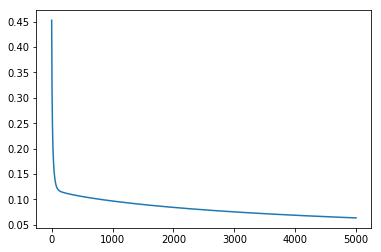

In [384]:
def forward_prop(X):
    z1 = linear_combination(w1,X,b1)
    a1 = sigmoid(z1)
    z2 = linear_combination(w2,a1,b2)
    a2 = sigmoid(z2)
    y = np.zeros(a2.shape)
    y[a2>=0.5] = 1
    y[a2<0.5] = 0
    
    return z1,a1,z2,a2,y

losses = []
for i in range(epochs):
    z1,a1,z2,a2,_ = forward_prop(X)
    
    #Back Prop
    loss = mse(Y,a2)
    losses.append(loss)
    
    da2 = (1/m) * (a2 - Y)
    dZ2 = da2 * sigmoid_grad(a2)
    dw2 = np.dot(dZ2,a1.T)
    db2 = np.sum(dZ2,axis=1,keepdims=True)
    
    da1 = np.dot(w2.T,dZ2) 
    dZ1 = da1 * sigmoid_grad(a1)
    dw1 = np.dot(dZ1,X.T)
    db1 = (1/m) * np.sum(dZ1)
                         
    w2-= learning_rate * dw2
    b2-= learning_rate * db2
    w1-= learning_rate * dw1
    b1-= learning_rate * db1
    
mp.plot(losses)
mp.show()

In [385]:
# Testing Here
print(forward_prop(X)[4])

[[0. 1. 1. 0.]]
